# Closed form solution for Linear regression 

1. Minimizes SUM of squared error 
2. Training data

x1 = (1,1)   y1 = 1.4 \
x2 = (2,1)   y2 = 0.5 \
x3 = (1,3)   y3 = 2 \
x4 = (3,3)   y4 = 2.5

In [72]:
import numpy as np

# Sample data
X = np.array([[1, 1], [2, 1], [1, 3], [3, 3]])  # Features
y = np.array([1.4, 0.5, 2, 2.5])  # Target

# Adding a column of ones for the intercept term
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Compute the closed-form solution
beta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)

# Extract coefficients
intercept = beta[0]
coefficients = beta[1:]

print("Intercept:", round(intercept,4))
print("Coefficients:", coefficients)

Intercept: 0.275
Coefficients: [0.02  0.645]


# Predict a value

Xnew = [2,3] \
ynew = ???

In [73]:
x_new = np.array([1,2,3]) # including the bias

ynew = beta.dot(x_new)

print(ynew)

2.25


# HyperPlane

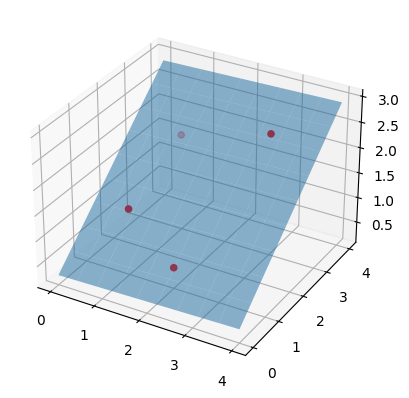

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_hyperplane_3d(w, points, target):
    x1 = np.linspace(0, 4, 10)
    x2 = np.linspace(0, 4, 10)
    a, b = np.meshgrid(x1,x2)
    N = x1.size
    X = np.array([np.ones(N**2), a.ravel(), b.ravel()]).transpose()
    o = X.dot(w)
    
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(a, b, np.reshape(o,(N,N)), alpha=0.5,
                    linewidth=0, antialiased=True)
    ax.scatter(points[:,1], points[:,2], y, color='red')


points = np.array([[1,1,1],[1,2,1],[1,1,3],[1,3,3]])
target = np.array([1.4,0.5,2,2.5])
plot_hyperplane_3d(beta,points,target)

# Compute mean square error (very easy)

Just apply the model to each point and calculate the mse

In [75]:
def computeValue(x,beta):
    return beta.dot(x)

points = np.array([[1,1,1],[1,2,1],[1,1,3],[1,3,3]])
target = np.array([1.4,0.5,2,2.5])

predicted = []
for e in points:
    predicted.append(computeValue(np.array(e),beta))


# Squared error
mse = np.mean((target-predicted) ** 2)

print(mse)

    

0.13224999999999998


# Question 2

New training data, now the ideia is to adopt log geatura transformation \
func(x) = log(x)  \
and find a closed form solution for a non linear regression \

Minimize: Sum of squared errors (on the training data)



In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

def non_linear_regression(x,y,phi):
    # Apply transformation
    phi_x = phi(x)
    
    # Construct X vector (accounting for bias)
    X_phi = np.concatenate([np.ones((x.shape[0],1)),phi_x],axis = 1)
    
    # Find solution
    
    w = np.linalg.inv(X_phi.transpose().dot(X_phi)).dot(X_phi.transpose()).dot(y)
    
    return X_phi, w

def phi1(x):
    return np.log(x)
def phi2(x):
    return x**2



# Sample training data
# Replace this with your own dataset
X_train = np.array([[3], [4], [6], [10], [12]])  # Sample input values
y_train = np.array([1.5, 11.3, 20.4, 35.8, 70.1])  # Sample target values

# Apply logarithmic transformation to the input
log_transformer = FunctionTransformer(np.log, validate=True)
X_train_log = log_transformer.transform(X_train)


# Fit a linear regression model
model = LinearRegression()

# LOG
model.fit(X_train_log, y_train)
beta_0 = model.intercept_
beta_1 = model.coef_[0]
print("Intercept (beta_0):", beta_0)
print("Coefficient (beta_1):", beta_1)

Intercept (beta_0): -48.57471052907908
Coefficient (beta_1): 42.14109666550108


In [77]:
# Apply square transformation to the input
square_transformer = FunctionTransformer(np.square, validate=True)
X_train_square = square_transformer.transform(X_train)


# SQUARE
model.fit(X_train_square, y_train)
beta_0 = model.intercept_
beta_1 = model.coef_[0]
print("Intercept (beta_0):", beta_0)
print("Coefficient (beta_1):", beta_1)

Intercept (beta_0): 0.7059343214181908
Coefficient (beta_1): 0.44449287997675097


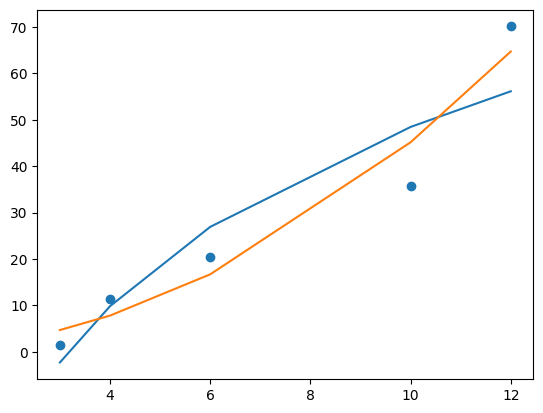

In [78]:
X_log, w_log = non_linear_regression(X_train,y_train,phi1)
X_sq, w_sq = non_linear_regression(X_train,y_train,phi2)

plt.scatter(X_train,y_train) 
plt.plot(X_train,X_log.dot(w_log), label = 'Log Regression')
plt.plot(X_train,X_sq.dot(w_sq), label = 'Square Regression')

plt.show()


In [79]:
# Predict target values using the fitted model
y_pred = model.predict(X_train_log)

# Calculate squared differences between predicted and actual values
squared_errors = (y_pred - y_train) ** 2

# Calculate the mean squared error
MSE = np.mean(squared_errors)
print("(LOG) Mean Squared Error (MSE):", MSE)

# Predict target values using the fitted model
y_pred = model.predict(X_train_square)

# Calculate squared differences between predicted and actual values
squared_errors = (y_pred - y_train) ** 2

# Calculate the mean squared error
MSE = np.mean(squared_errors)
print("(SQUARE) Mean Squared Error (MSE):", MSE)

(LOG) Mean Squared Error (MSE): 1256.2076784282715
(SQUARE) Mean Squared Error (MSE): 30.51611206044754


# Question 3 

## Data SET

```
(data)
x1 = (-1,0)
x2 = (0,0.25)
x3 = (1,1)
x4 = (1,-1)

(target)
y1 = 0
y2 = 1
y3 = 1
y4 = 0
```

## Three epocs of gradient descent

In [80]:
import numpy as np

def lr_batch_gd(inputs, labels, w, eta):
    # Compute vector of probabilities of size p+1.
    probs = 1 / (1 + np.exp(-inputs.dot(w)))

    # Compute gradient of loss function; vector of size p+1.
    gradient = inputs.T.dot(probs - labels)

    # Gradient descent update of w
    w = w - eta * gradient
    return w

x = np.array([[-1,0],
              [0, 0.25],
              [1, 1],
              [1, -1]])

# Adding column of 1s to account for bias
inputs = np.concatenate([np.ones((x.shape[0],1)), x], axis = 1)

y = np.array([0, 1, 1, 0])

# Initialize weights and set learning rate
w0 = np.array([0, 0, 0])
eta = 1.0

# Test function
lr_batch_gd(inputs, y, w0, eta)

array([0.   , 0.5  , 1.125])

In [81]:
def lr_sgd(inputs, labels, w, eta):
    # For each training example 
    for x, y in zip(inputs, labels):
        # Compute probability y_hat
        y_hat = 1 / (1 + np.exp(-w.dot(x)))
        
        # Compute gradient
        gradient = (y - y_hat) * x
        
        # Update weights:
        w = w + eta * gradient
        
    return w

x = np.array([[-1,0],
              [0, 0.25],
              [1, 1],
              [1, -1]])

# Adding column of 1s to account for bias
inputs = np.concatenate([np.ones((x.shape[0],1)), x], axis = 1)

y = np.array([0, 1, 1, 0])

# Initialize weights and set learning rate
w0 = np.array([0, 0, 0])
eta = 1.0

# Test function
lr_sgd(inputs, y, w0, eta)

array([-0.24882603,  0.12871464,  1.15637038])

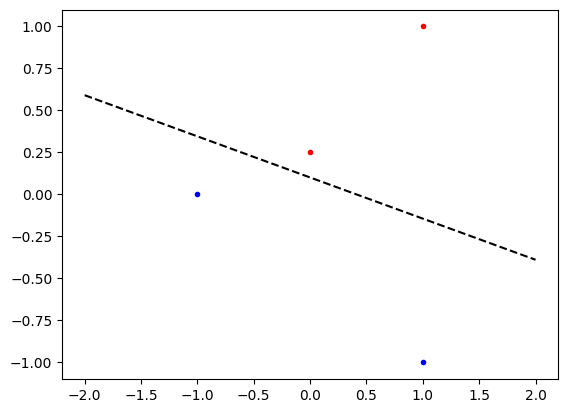

In [82]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()


# SGD
w = w0

for epoch in range(3):
    w = lr_sgd(inputs, y, w, eta)

plot_separation_line(inputs, y, w)

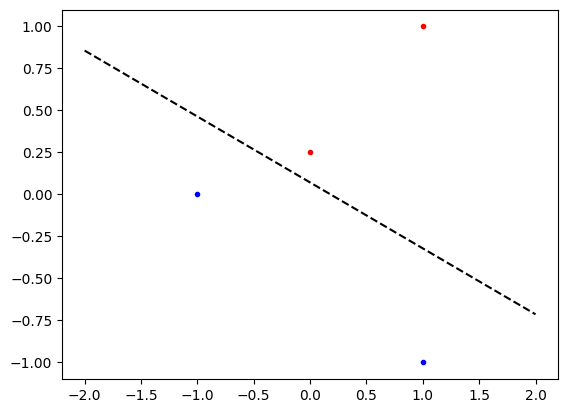

In [83]:
# GD
w = w0

for epoch in range(3):
    w = lr_batch_gd(inputs, y, w, eta)

plot_separation_line(inputs, y, w)

# Apply this on --> UCI handwritten digits

1) Split data in 80% and 20%
2) SGD for multi class logistic regression
3) 100 epocs of my alghorithm on the training data
   --> weights = 0 and learning rate of 0.001
4) accuracies train and test sets
5) compare to scikit learn implementation  

There are 1797 observations with 64 features classified into 10 classes.


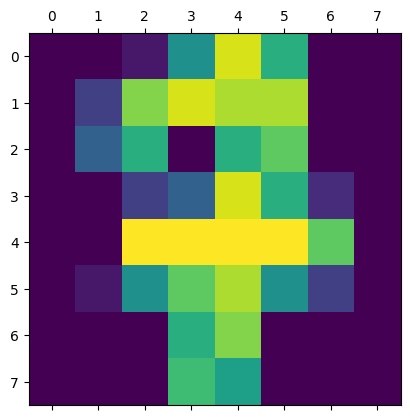

In [96]:
from sklearn.datasets import load_digits
data = load_digits()

inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

n, p = np.shape(inputs)
n_classes = len(np.unique(labels))  # labels are 0, 1, ..., num_labels-1

print(f'There are {n} observations with {p} features classified into {n_classes} classes.')

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((n, 1)), inputs], axis=1)

# Observation example
plt.matshow(data.images[17])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

In [99]:
def multi_class_lr_epoch(inputs, labels, W, eta):
    # For each observation in data
    for x, y in zip(inputs, labels):
        
        # Get probability scores according to the model (num_labels x 1).
        label_scores = np.expand_dims(W.dot(x), axis = 1)

        # One-hot encode true label (num_labels x 1).
        y_one_hot = np.zeros((np.size(W, 0),1))
        y_one_hot[y] = 1

        # Softmax function
        # This gives the label probabilities according to the model (num_labels x 1).
        label_probabilities = np.exp(label_scores) / np.sum(np.exp(label_scores))
        
        # SGD update. W is num_labels x num_features.
        W = W + eta * (y_one_hot - label_probabilities).dot(np.expand_dims(x, axis = 1).T)
    return W

W = np.zeros((n_classes, p+1))
eta = 0.001

for epoch in range(100):
    W = multi_class_lr_epoch(X_train, y_train, W, eta)

In [100]:
def multi_class_classify(inputs, W):
    
    y_hat = np.argmax(inputs.dot(W.T), axis = 1)
    
    return y_hat

y_train_pred = multi_class_classify(X_train, W)
y_test_pred = multi_class_classify(X_test, W)

print(f'Train accuracy: {(y_train_pred==y_train).mean()}')
print(f'Test accuracy: {(y_test_pred==y_test).mean()}')

Train accuracy: 0.9993041057759221
Test accuracy: 0.9638888888888889


In [101]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='none')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9583333333333334
